In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
df = pd.read_csv("/content/hearing_test.csv")

In [72]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [73]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [74]:
df["test_result"].value_counts()

,count
test_result,
1,3000
0,2000


<Axes: xlabel='test_result', ylabel='count'>

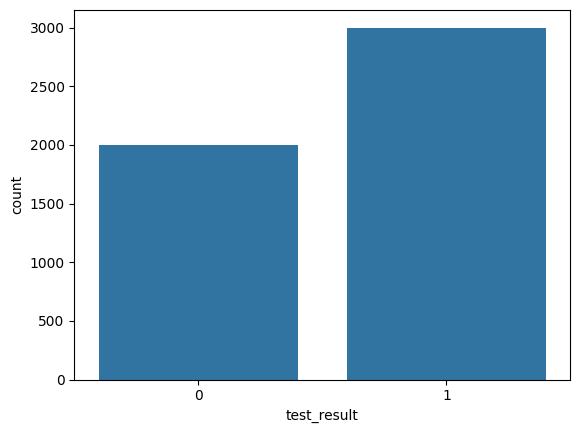

In [75]:
sns.countplot(data=df, x="test_result")

<Axes: xlabel='test_result', ylabel='age'>

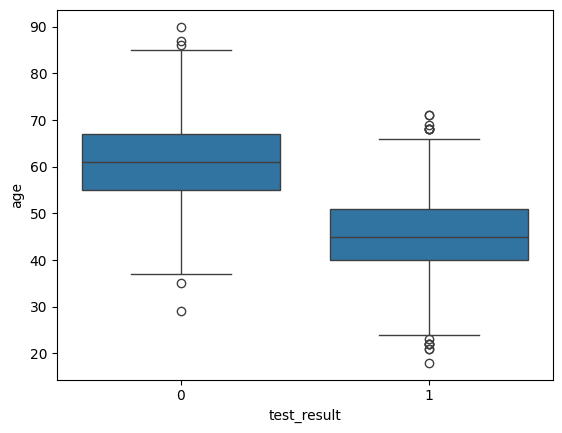

In [76]:
sns.boxplot(x="test_result", y="age", data=df)

<Axes: xlabel='test_result', ylabel='physical_score'>

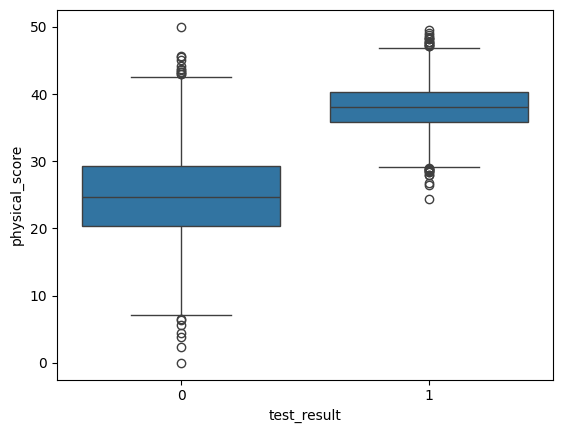

In [77]:
sns.boxplot(x="test_result", y="physical_score", data=df)

<Axes: xlabel='age', ylabel='physical_score'>

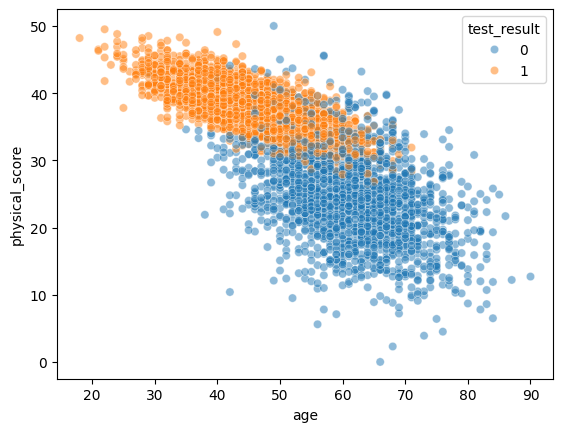

In [78]:
sns.scatterplot(x="age", y="physical_score", hue="test_result", data=df, alpha=0.5)

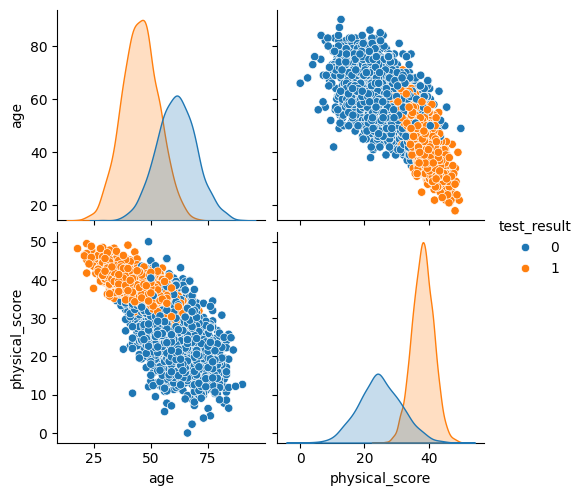

In [79]:
sns.pairplot(df, hue="test_result")

<Axes: >

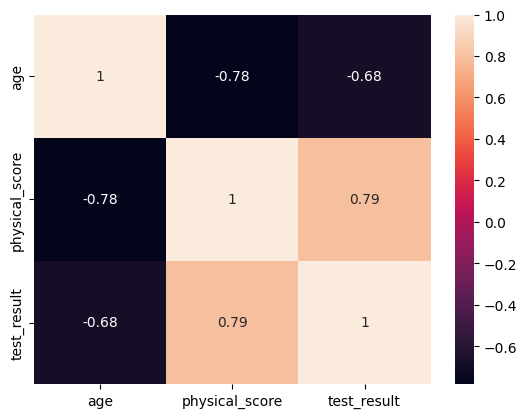

In [80]:
sns.heatmap(df.corr(), annot=True)

<Axes: xlabel='physical_score', ylabel='test_result'>

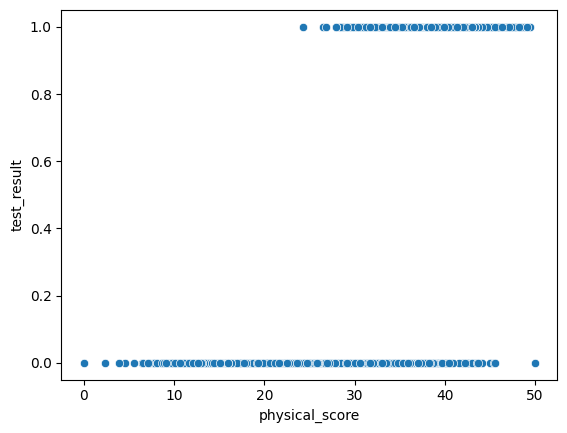

In [81]:
sns.scatterplot(x="physical_score", y="test_result", data=df)

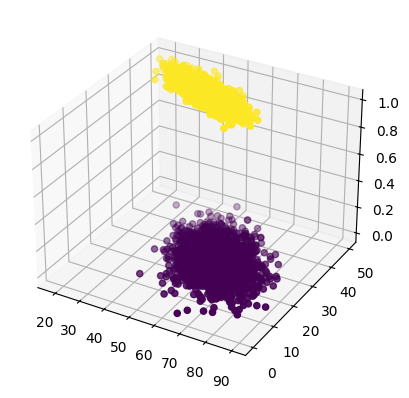

In [82]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df["age"], df["physical_score"], df["test_result"], c=df["test_result"])

In [83]:
X = df.drop("test_result", axis=1)

In [84]:
y= df["test_result"]

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [88]:
scaler = StandardScaler()

In [89]:
scaled_X_train = scaler.fit_transform(X_train)

In [90]:
scaled_X_test = scaler.transform(X_test)

In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
log_model = LogisticRegression()

In [93]:
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [94]:
log_model.coef_

array([[-0.95017725,  3.46148946]])

In [95]:
y_pred = log_model.predict(scaled_X_test)

In [96]:
y_pred_proba = log_model.predict_log_proba(scaled_X_test)

In [97]:
y_pred_proba

array([[-3.73785268e+00, -2.40930870e-02],
       [-3.61617163e+00, -2.72534309e-02],
       [-1.08384922e-02, -4.53006574e+00],
       [-6.26464562e+00, -1.90419931e-03],
       [-2.52503849e-02, -3.69151251e+00],
       [-1.03767347e-02, -4.57337290e+00],
       [-2.60428647e+00, -7.68334088e-02],
       [-4.07077775e+00, -1.72113815e-02],
       [-2.92888622e-03, -5.83459714e+00],
       [-3.41096737e+00, -3.35663522e-02],
       [-2.48844036e+00, -8.66907488e-02],
       [-4.61441667e+00, -9.95737179e-03],
       [-4.95136496e+00, -7.09888452e-03],
       [-6.79358446e-02, -2.72296711e+00],
       [-9.06109111e+00, -1.16102973e-04],
       [-2.72081293e+00, -6.80874510e-02],
       [-1.09037367e-02, -4.52409665e+00],
       [-5.88066948e+00, -2.79682232e-03],
       [-7.49294301e+00, -5.57156469e-04],
       [-3.47184104e-03, -5.66480569e+00],
       [-1.25674340e-01, -2.13624049e+00],
       [-2.03284010e+00, -1.40369627e-01],
       [-6.05521411e-01, -7.89195131e-01],
       [-3.

In [98]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [99]:
y_test

,test_result
1718,1
2511,1
345,0
2521,1
54,0
...,...
4770,1
188,1
3335,0
4583,0


In [100]:
y_pred = log_model.predict(scaled_X_test)

In [101]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [102]:
accuracy_score(y_test, y_pred)

0.93

In [103]:
confusion_matrix(y_test, y_pred)

array([[172,  21],
       [ 14, 293]])

In [104]:
from sklearn.metrics import ConfusionMatrixDisplay

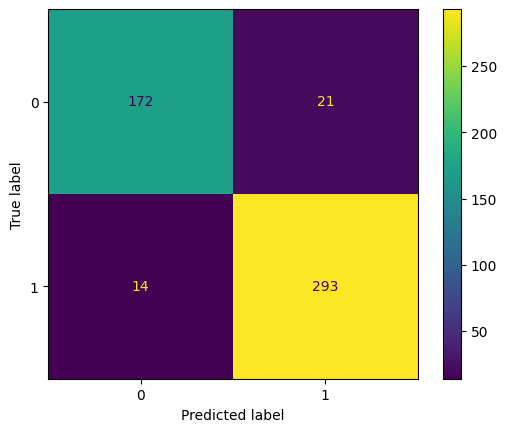

In [105]:
ConfusionMatrixDisplay.from_estimator(log_model, scaled_X_test, y_test)

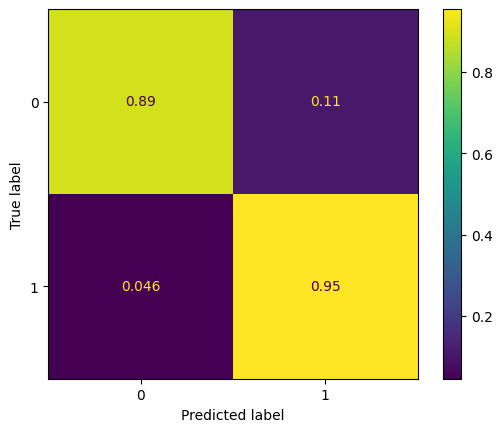

In [107]:
ConfusionMatrixDisplay.from_estimator(log_model, scaled_X_test, y_test, normalize="true")

In [109]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [110]:
from sklearn.metrics import precision_score, recall_score

In [111]:
precision_score(y_test, y_pred)

0.9331210191082803

In [112]:
recall_score(y_test, y_pred)

0.9543973941368078

In [115]:
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

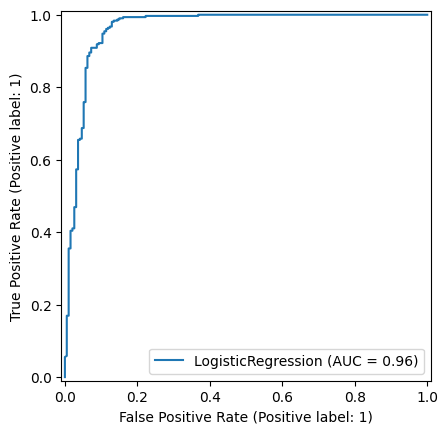

In [116]:
RocCurveDisplay.from_estimator(log_model, scaled_X_test, y_test)

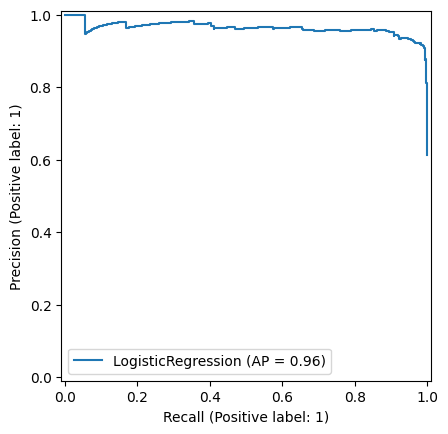

In [117]:
PrecisionRecallDisplay.from_estimator(log_model, scaled_X_test, y_test)